In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import geopandas as gpd
import rioxarray as rxr
import rasterio
from rasterio.plot import show, adjust_band
from matplotlib import cm
import matplotlib
from scipy import stats
import datetime
# from constants import *  # this needs to run on a slurm kernel 
import pandas as pd
import pickle
from pyproj import crs
from shapely.geometry import Point

homedir = '/global/home/users/cowherd/snow_fires/'
rawdatadir = '/global/scratch/users/cowherd/'
datadir = rawdatadir + 'snow_fires_data/'
os.chdir(homedir)

wgs_crs = crs.CRS('epsg:4326')
use_crs = wgs_crs
# plt.style.use(home_dir+'stylefile.mplstyle')

In [1]:
## run this if loading data from previous cells
gages_metadata = gpd.read_file(datadir + 'gages_metadata.gdf')
fires_allyears = gpd.read_file(datadir + 'fires_allyears.gdf')
bas_all = gpd.read_file(datadir + 'bas_all.gdf')
gaged_basins_gdf = gpd.read_file(datadir + 'gaged_basins_gdf.gdf')
with open(datadir + 'streamflowdata/gaged_basins.pickle', 'rb') as handle:
    gaged_basins = pickle.load(handle)


NameError: name 'gpd' is not defined

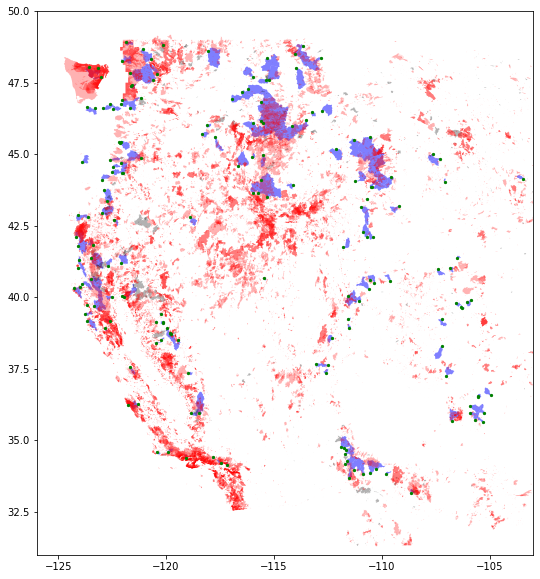

<Figure size 432x288 with 0 Axes>

In [12]:
fig,ax=plt.subplots(figsize=(10,10))
gaged_basins_gdf.plot(ax=ax,color='blue',alpha = 0.5)
wfigs_rp.plot(ax=ax,color='red',alpha=0.3)
fires_allyears.plot(ax=ax,color='red',alpha= 0.3)
gages_metadata.plot(ax=ax,color='green',markersize=5)
ax.set_xlim(-126,-103)
ax.set_ylim(31,50)
plt.show()
plt.savefig(homedir + 'figures/fires_and_basins.jpg')

<AxesSubplot:>

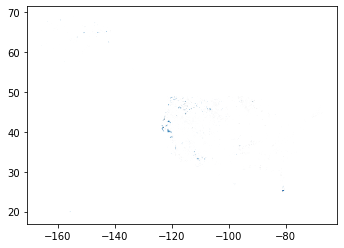

In [23]:
wfigs_rp.geometry.plot()

In [18]:
## plot showing gaged basins that fit the williams parameters, location of the gages, and fire boundaries
fig,ax=plt.subplots(figsize=(10,10))
#alldata.geometry.plot(ax=ax,color='blue')
gaged_basins_gdf.plot(ax=ax,color='blue')
md_gdf_rp.plot(ax=ax,color='k',markersize=2)
all_years_rp.plot(ax=ax,color='red',alpha=0.5)
ax.set_xlim(-2.3e6,0)
ax.set_ylim(1e6,3.1e6)
plt.show()

/global/home/users/cowherd/.conda/envs/snow/lib/python3.9/site-packages/geopandas/io/file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


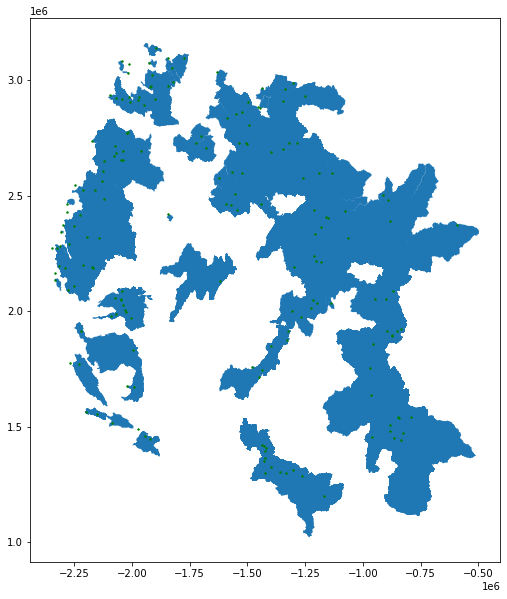

(1000000.0, 3100000.0)

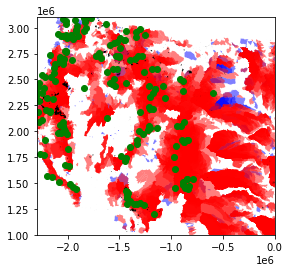

In [109]:
## all post-fire years, average modis snow covered fraction

this is where we transition to looking at the sierra nevada only

<AxesSubplot:>

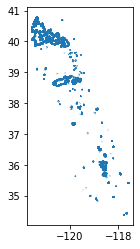

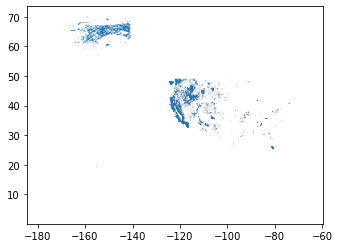

In [106]:

sn_allyears = gpd.sjoin(all_years,sn_watersheds)
sn_wfigs = gpd.sjoin(wfigs,sn_watersheds)
sn_wfigs.boundary.plot()
all_years.plot()

<AxesSubplot:>

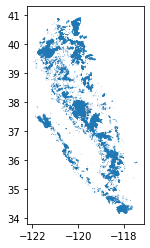

In [110]:
fig,ax=plt.subplots()
sn_allyears.plot()


In [104]:
caldor = sn_wfigs[sn_wfigs.OBJECTID==13419]
caldor.to_file('caldor.shp')

C:\Users\Marianne\AppData\Local\Temp/ipykernel_18876/408928313.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  caldor.to_file('caldor.shp')


<AxesSubplot:>

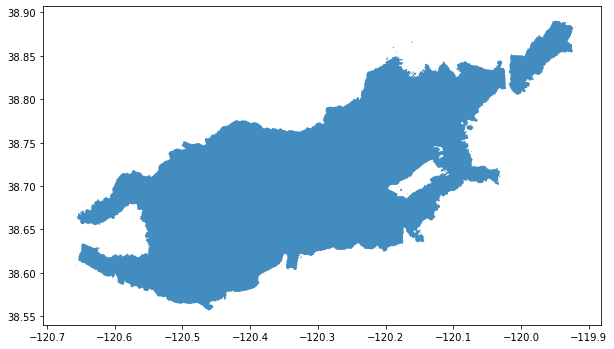

In [105]:
fig,ax=plt.subplots(figsize=(10,10))
caldor.plot(ax=ax,alpha=0.3)

In [104]:
idxs = sn_allyears.irwin_Cont.keys()
tmp = []
for i,x in enumerate(idxs):
    tmp.append(x)
sn_allyears['count']=tmp


In [10]:
print(all_years)

           FID  OBJECTID   MAP_METHOD  DATE_CUR COMMENTS  \
0            1         1   GPS Ground  20200623     None   
1            2         2   GPS Ground  20200604     None   
2            3         3   GPS Ground  20200301     None   
3            4         4   GPS Ground  20200401     None   
4            5         5   GPS Ground  20200419     None   
...        ...       ...          ...       ...      ...   
107862  107863    107863  GPS-Unknown  20210204     None   
107863  107864    107864  GPS-Unknown  20210204     None   
107864  107865    107865  GPS-Unknown  20210204     None   
107865  107866    107866  GPS-Unknown  20210204     None   
107866  107867    107867  GPS-Unknown  20210204     None   

                                        GEO_ID IRWINID         UNQE_FIRE_  \
0                                            1    None               None   
1                                            2    None               None   
2                                            3  

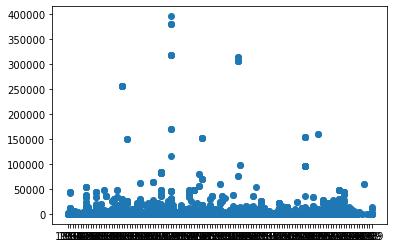

In [118]:
plt.plot(sn_allyears.FIRE_YEAR,sn_allyears.GIS_ACRES,'o')

In [91]:
# sn_wfigs = gpd.sjoin(wfigs,sn_watersheds)
tmp = []
for i in sn_wfigs.irwin_Cont.keys():
    try: tmp.append(datetime.datetime.strptime(sn_wfigs.irwin_Cont[i], '%Y-%m-%d'))
    except: tmp.append(np.nan)
sn_wfigs['dt'] = tmp

In [126]:
fire_sn.BurnBndAc

0       79978
1        2814
2       34459
3        1761
4       49588
        ...  
1017     1089
1018     1477
1019     3014
1020     3014
1021    12765
Name: BurnBndAc, Length: 1022, dtype: int64

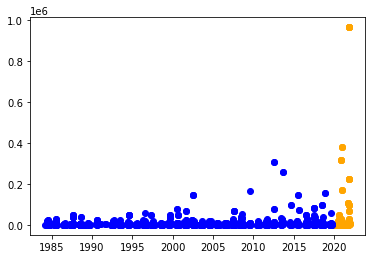

In [127]:
fig,ax=plt.subplots()
ax.plot(sn_wfigs.dt,sn_wfigs.poly_Acres,'o',color='orange')
ax.plot(fire_sn.dt,fire_sn.BurnBndAc,'o',color='blue')

In [150]:
vals = fire_sn.dt
fire_sn['year'] = [v.year for v in vals]
vals = sn_wfigs.dt
sn_wfigs['year'] = [v.year for v in vals]

In [151]:
yearly_acres = fire_sn.groupby(["year"])["BurnBndAc"].sum()
yearly_acres_recent = sn_wfigs.groupby(['year'])['poly_Acres'].sum()


In [164]:
yearly_acres = yearly_acres.append(yearly_acres_recent)
km2ac = 0.0040468564224
yearly_km = [yearly_acres[i]/km2ac for i in yearly_acres.keys()]

In [210]:
yearly_acres_list = yearly_acres.tolist()
yearly_acres_list = yearly_acres_list[0:37]
ac2km = 0.0040468564224

yearly_km_list = [v*ac2km for v in yearly_acres_list]

Text(0.5, 0, 'year')

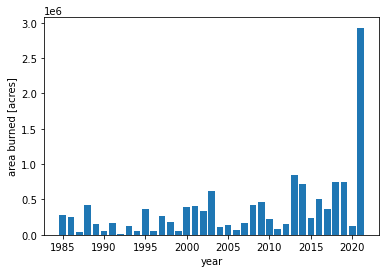

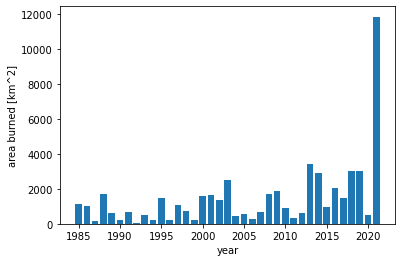

In [211]:
years = range(1985,2022)
fig,ax= plt.subplots()
ax.bar(years,yearly_acres_list[0:len(years)])
#  ax.bar(yearly_acres_recent.keys(),[yearly_acres_recent[i] for i in yearly_acres_recent.keys()])
ax.set_ylabel('area burned [acres]')
ax.set_xlabel('year')
# x.text(1990,4e6,'Sierra Nevada Only')

fig,ax= plt.subplots()
ax.bar(years,yearly_km_list[0:len(years)])
#  ax.bar(yearly_acres_recent.keys(),[yearly_acres_recent[i] for i in yearly_acres_recent.keys()])
ax.set_ylabel('area burned [km^2]')
ax.set_xlabel('year')



<AxesSubplot:>

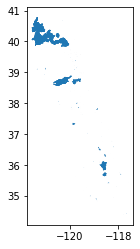

In [101]:
fig,ax= plt.subplots()
sn_wfigs.plot(ax=ax)

In [44]:
print(sn_wfigs.keys()[100:135])
sn_wfigs.loc[sn_wfigs['huc8']==18040006]
#fire_sn['Incid_Name']

Index(['irwin_Mo_1', 'irwin_Cr_1', 'GlobalID', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'index_right', 'tnmid', 'metasource', 'sourcedata',
       'sourceorig', 'sourcefeat', 'loaddate', 'gnis_id', 'areaacres',
       'areasqkm', 'states', 'huc8', 'name', 'shape_star', 'shape_stle',
       'index_righ', 'US_L3CODE', 'US_L3NAME', 'NA_L3CODE', 'NA_L3NAME',
       'NA_L2CODE', 'NA_L2NAME', 'NA_L1CODE', 'NA_L1NAME', 'STATE_NAME',
       'EPA_REGION', 'L3_KEY', 'L2_KEY', 'L1_KEY'],
      dtype='object')


,OBJECTID,poly_Incid,poly_Featu,poly_MapMe,poly_GISAc,poly_Creat,poly_DateC,poly_Polyg,poly_Acres,poly_Globa,...,NA_L3NAME,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,STATE_NAME,EPA_REGION,L3_KEY,L2_KEY,L1_KEY


In [95]:
sjhuc8 = 18040006
tmp=[]
tmp2=[]
key = 'Creek'
for idx in sn_wfigs.index:
    name = sn_wfigs.loc[idx]['poly_Incid']
    if key in name:
        #tmp.append(sn_wfigs['OBJECTID'][i])
        tmp.append(idx)
    huc =(sn_wfigs.loc[idx]['huc8'])
    if huc == sjhuc8:
        tmp2.append(idx)
# fire_sn[key in x for x in fire_sn['Incid_Name']]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [100]:
sorted(sn_wfigs.loc[:]['poly_Incid'].values)

['1-4 BIZZ',
 '1-4 BIZZ',
 'ABERNATHY',
 'AIROLA',
 'Airport',
 'Arnott',
 'Artesia',
 'BEAR',
 'BELLEVUE AV / MCKINNEY RUBICON SPRINGS RD',
 'BLUE',
 'BODFISH',
 'Backus 2',
 'Backus CA-CDD- 6791',
 'Brady',
 'Brady',
 'Bridge',
 'Browns',
 'Browns',
 'Brush',
 'Buckskin',
 'CARLON',
 'CASE',
 'CRANE',
 'CRATER',
 'CUTOFF',
 'Caldor',
 'Caldor',
 'Caldor',
 'Caldor',
 'Caldor',
 'Canyon',
 'Canyon',
 'Chance',
 'Chili Fire',
 'Chili Fire',
 'Clover',
 'Cold',
 'Cold',
 'Colony_KNP Complex',
 'Conner Fire',
 'Conner Fire',
 'County Line',
 'County Line',
 'Crawford',
 'DUCK HILL',
 'DUCK HILL',
 'DUCK HILL',
 'DUCK HILL',
 'Dexter',
 'Dexter',
 'Dixie',
 'Dixie',
 'Dixie',
 'Dixie',
 'Dixie',
 'Dixie',
 'Dixie',
 'Dog fire',
 'EARLY',
 'Eagle Canyon',
 'Eagle Canyon',
 'East Fork',
 'East Fork',
 'Evans',
 'Fay',
 'Fay',
 'Flint',
 'Flint',
 'Fly',
 'Fork',
 'Fremont Lake',
 'French',
 'French',
 'French',
 'GLACIER',
 'GOLF COURSE',
 'GRAPEVINE',
 'GRAYS',
 'Garson',
 'Garson',
 'Gree

C:\Users\Marianne\AppData\Local\Temp/ipykernel_18876/3330940715.py:7: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  creekfire.to_file('creek.shp')


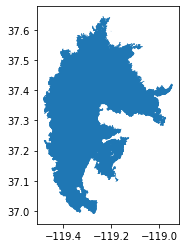

In [144]:
fires2020=sn_allyears.loc[sn_allyears.FIRE_YEAR =='2020']
mask2020 = sn_allyears.loc[sn_allyears.FIRE_YEAR =='2020'].INCIDENT.values == 'CREEK' # keys()
creekfire = fires2020[mask2020]
creekfid = 76487
creekobjid = 76487
creekfire.plot()
creekfire.to_file('creek.shp')


In [115]:
sn_allyears.keys()

Index(['FID', 'OBJECTID', 'MAP_METHOD', 'DATE_CUR', 'COMMENTS', 'GEO_ID',
       'IRWINID', 'UNQE_FIRE_', 'FIRE_YEAR', 'LOCAL_NUM', 'INCIDENT',
       'UNIT_ID', 'POO_RESP_I', 'FEATURE_CA', 'GIS_ACRES', 'USER_NAME',
       'SOURCE', 'AGENCY', 'FIRE_YEAR_', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'index_right', 'tnmid', 'metasource', 'sourcedata',
       'sourceorig', 'sourcefeat', 'loaddate', 'gnis_id', 'areaacres',
       'areasqkm', 'states', 'huc8', 'name', 'shape_star', 'shape_stle',
       'index_righ', 'US_L3CODE', 'US_L3NAME', 'NA_L3CODE', 'NA_L3NAME',
       'NA_L2CODE', 'NA_L2NAME', 'NA_L1CODE', 'NA_L1NAME', 'STATE_NAME',
       'EPA_REGION', 'L3_KEY', 'L2_KEY', 'L1_KEY'],
      dtype='object')

0           1
1           2
2           3
3           4
43         44
         ... 
68624    None
68643    None
68646    None
68735    None
71888    None
Name: GEO_ID, Length: 16884, dtype: object